**Importing all the necessary libraries**

In [1]:
!pip install GetOldTweets3

In [0]:
import GetOldTweets3 as got
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob

**Adding necessary functions to aadd tweets**

In [0]:
def username_tweets_to_csv(username, count):
  tweetCriteria = got.manager.TweetCriteria().setUsername(username).setMaxTweets(count)
  tweets = got.manager.TweetManager.getTweets(tweetCriteria)
  user_tweets = [[tweet.date, tweet.text] for tweet in tweets]
  tweets_dataset = pd.DataFrame(user_tweets, columns = ['Datetime', 'Text'])
  tweets_dataset.to_csv('{}-tweets.csv'.format(username), sep=',')

**Importing data from tweeter handle for analysis as toxic or non-toxic**

**Analysis on BBC World**

In [0]:
username = 'BBCWorld'
count = 1000
username_tweets_to_csv(username, count)

In [0]:
dataset = pd.read_csv('/content/BBCWorld-tweets.csv')

In [0]:
dataset=dataset.drop(['Unnamed: 0','Datetime'], 1)

In [9]:
dataset.head()

,Text
0,Coronavirus: Hard-hit Brazil removes data amid...
1,Two Buffalo policemen charged for shoving 75-y...
2,In pictures: Global protests against racism an...
3,Coronavirus: Far-right Rome protest turns brie...
4,"""Something's different now... enough people ar..."


**Applying Sentiment Analysis**

In [11]:
Sentiment = []
Score = []
i = 0

while (i < len(dataset['Text'])):
  sample = dataset['Text'][i]
  analysis = TextBlob(sample)

  if (analysis.sentiment.polarity >= 0.5):
    data1 = "Positive"
  elif (analysis.sentiment.polarity <= -0.5):
    data1 = "Negative"
  else:
    data1 = "Neutral"
  
  Sentiment.append(data1)
  Score.append(analysis.sentiment.polarity)
  i += 1
else :
  print("Successful")

Successful


In [0]:
dataset['Sentiment'] = Sentiment
dataset['Score'] = Score 

In [13]:
dataset.head()

,Text,Sentiment,Score
0,Coronavirus: Hard-hit Brazil removes data amid...,Neutral,0.0
1,Two Buffalo policemen charged for shoving 75-y...,Neutral,0.0
2,In pictures: Global protests against racism an...,Neutral,0.0
3,Coronavirus: Far-right Rome protest turns brie...,Negative,-0.8
4,"""Something's different now... enough people ar...",Neutral,0.1


**Here we saw the tweets got categorized succefylly**

**Now lets Visualize the Analysis Score for it:**

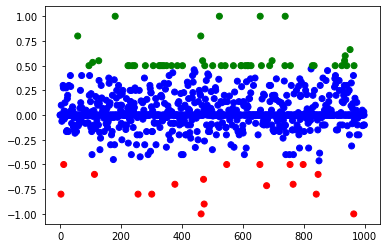

In [15]:
color = np.where(dataset["Sentiment"]== "Positive",'g', np.where(dataset["Sentiment"]== "Negative",'r','b'))
plt.scatter(dataset['Score'].index, dataset['Score'], c=color)

**Analysis Score**

In [16]:
poscount = dataset[(dataset['Sentiment'] == "Positive")]["Sentiment"].count()
negcount = dataset[(dataset['Sentiment'] == "Negative")]["Sentiment"].count()
neucount = dataset[(dataset['Sentiment'] == "Neutral")]["Sentiment"].count()
print('Positive Sentiment = ',(poscount/1000)*100,'%')
print('Neutral Sentiment = ',(neucount/1000)*100,'%')
print('Negative Sentiment = ',(negcount/1000)*100,'%')

Positive Sentiment =  4.9 %
Neutral Sentiment =  93.30000000000001 %
Negative Sentiment =  1.7999999999999998 %
